# Assignment 6.6
# Allison Weese

## This script contains the following
### 1. Importing libraries and data
### 2. Subsetting, wrangling, and cleaning time-series data
### 3. Time-series analysis: decomposition
### 4. Testing for stationarity 
### 5. Stationarizing 

### 1. Importing libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [2]:
# Configure API Key

quandl.ApiConfig.api_key = 'oKfsec7Qiw7tYFEvAz5p'

In [3]:
# Importing the Federal Reserve Economic Data "gross domestic product"

data = quandl.get('FRED/GDP')

In [4]:
data.head()

,Value
Date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742


In [5]:
data.shape

(300, 1)

In [6]:
data.columns

Index(['Value'], dtype='object')

In [8]:
type(data)

pandas.core.frame.DataFrame

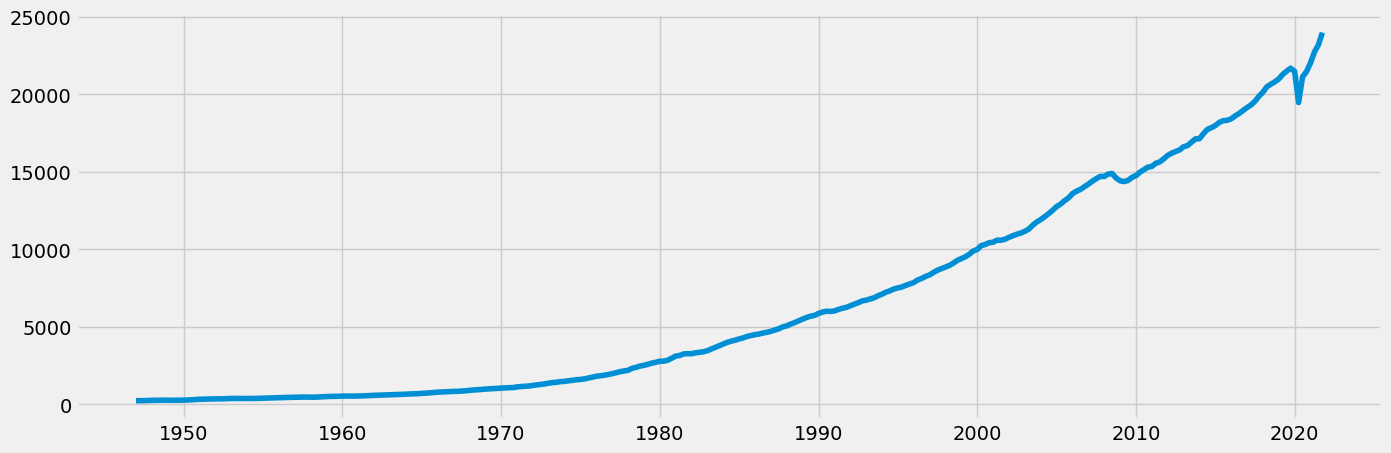

In [9]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

### 2. Subsetting, wrangling, and cleaning time-series data

In [10]:
# Reset index so that you can use the "Date" column as a filter

data_2 = data.reset_index()

In [11]:
data_2.head()

,Date,Value
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


In [12]:
data_sub = data_2.loc[(data_2['Date'] >= '1980-01-01') & (data_2['Date'] < '2020-06-01')]

In [32]:
# i chose these dates in order to focus on a specific time period and it seemed logical
# to follow the same instructions from the example since I am also using FRED data
# and cut the data off due to covid

In [13]:
data_sub.shape

(162, 2)

In [14]:
data_sub.head()

,Date,Value
132,1980-01-01,2789.842
133,1980-04-01,2797.352
134,1980-07-01,2856.483
135,1980-10-01,2985.557
136,1981-01-01,3124.206


In [15]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Value
datetime,
1980-01-01,2789.842
1980-04-01,2797.352
1980-07-01,2856.483
1980-10-01,2985.557
1981-01-01,3124.206


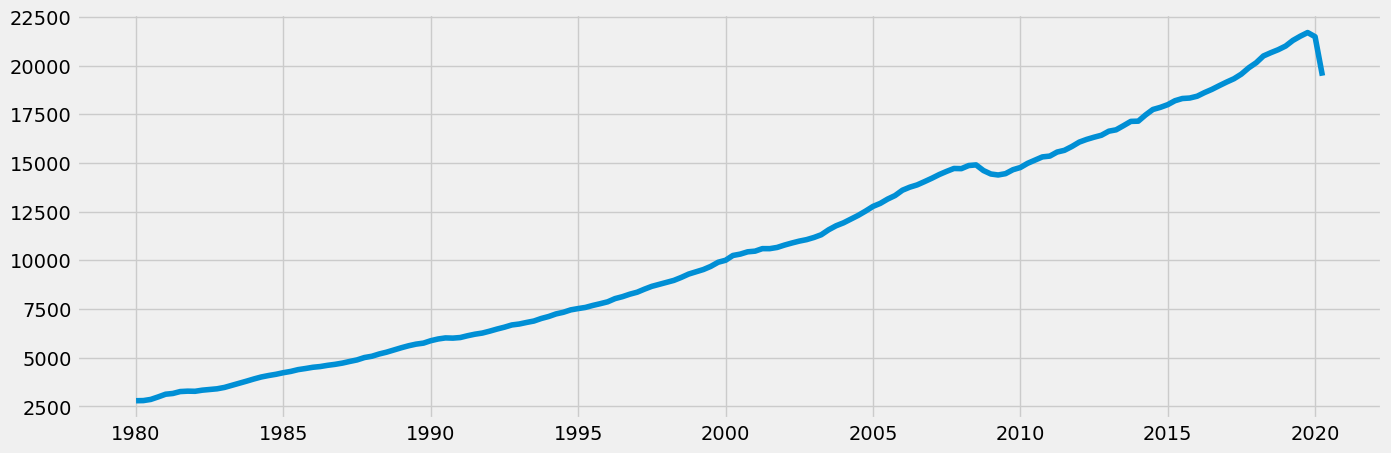

In [16]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [17]:
# Check for missing values (you shouldn't have any)

data_sub.isnull().sum() 

Value    0
dtype: int64

In [18]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

0

### 3. Time-series analysis: decomposition

In [19]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [20]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

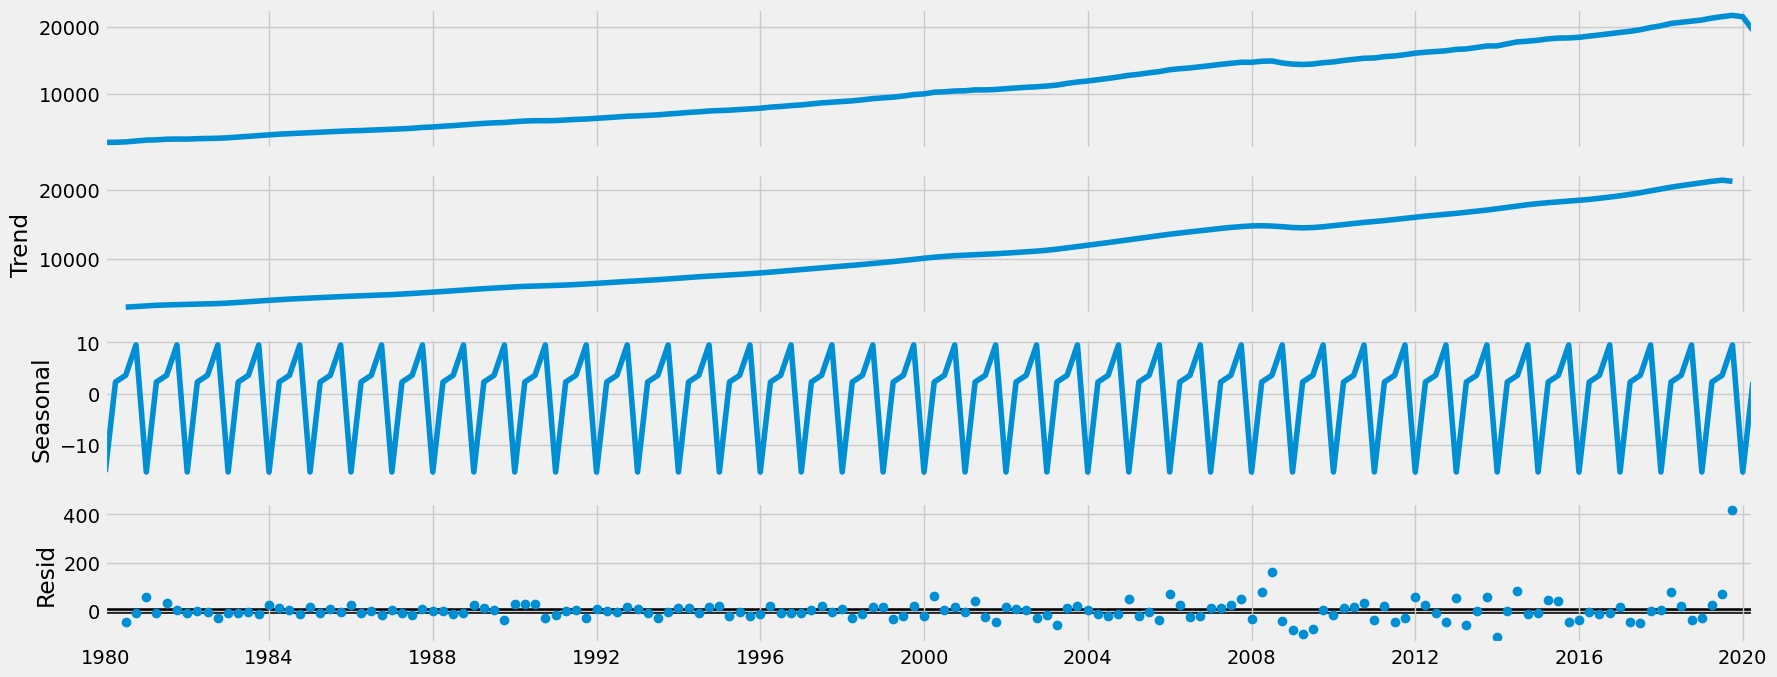

In [21]:
# Plot the separate components

decomposition.plot()
plt.show()

#### Overall, the decomposition reveals that the GDP data is heavily influenced by its long-term trend, with minimal seasonality and some level of noise in the residuals. This suggests that while there are short-term fluctuations in GDP, the dominant factor is the long-term economic growth trend. Any forecasts or analyses based on this data should account for the strong trend component and the relatively low impact of seasonal effects.

### 4. Testing for stationarity

In [22]:
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries): 
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -1.907504
p-value                          0.328539
Number of Lags Used              2.000000
Number of Observations Used    159.000000
Critical Value (1%)             -3.472161
Critical Value (5%)             -2.879895
Critical Value (10%)            -2.576557
dtype: float64


#### The Dickey-Fuller test results suggest that after the transformation (such as differencing), the time series is stationary. This means that the statistical properties of the time series are stable over time, which is essential for accurate forecasting and further time-series analysis.

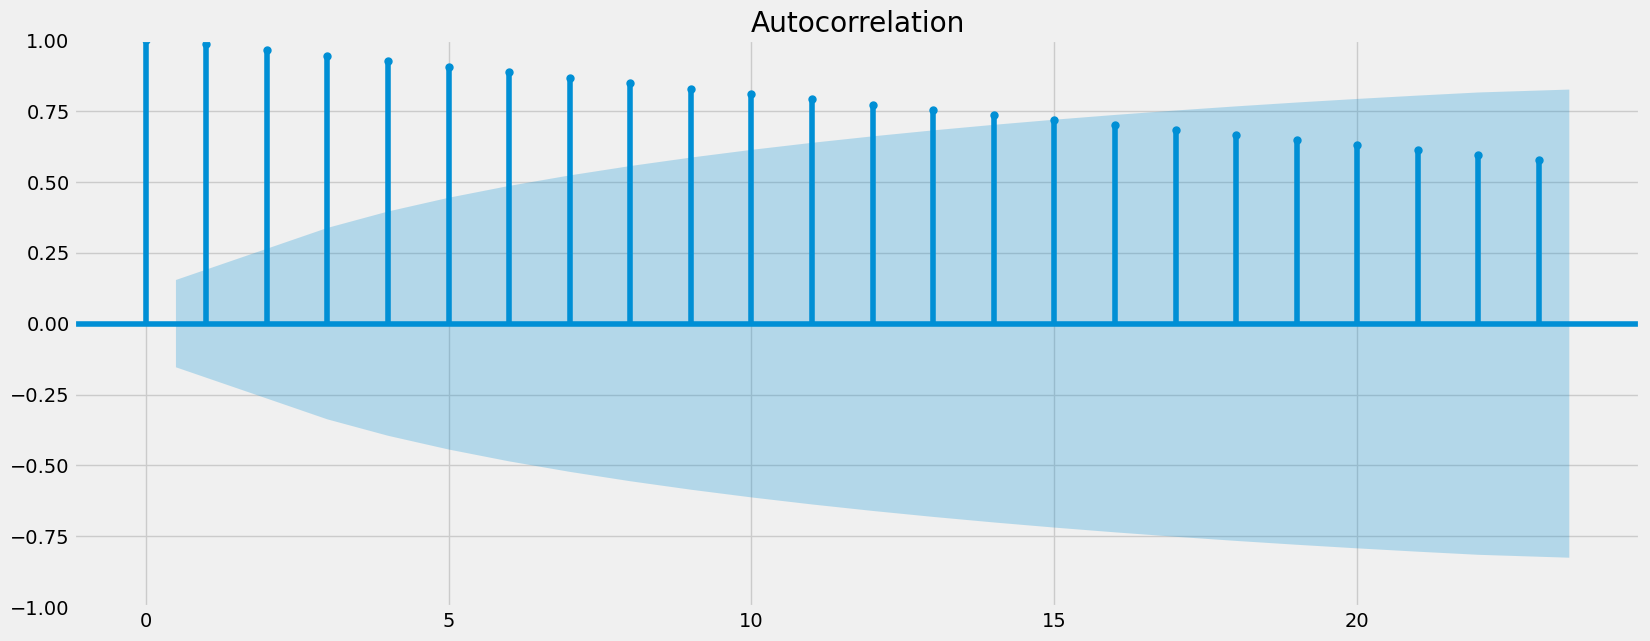

In [23]:
# plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(data_sub)
plt.show()

### 5. Stationarizing

In [24]:
data_diff = data_sub - data_sub.shift(1)

In [25]:
data_diff.dropna(inplace = True)

In [26]:
data_diff.head()

,Value
datetime,
1980-04-01,7.510
1980-07-01,59.131
1980-10-01,129.074
1981-01-01,138.649
1981-04-01,38.326


In [27]:
data_diff.columns

Index(['Value'], dtype='object')

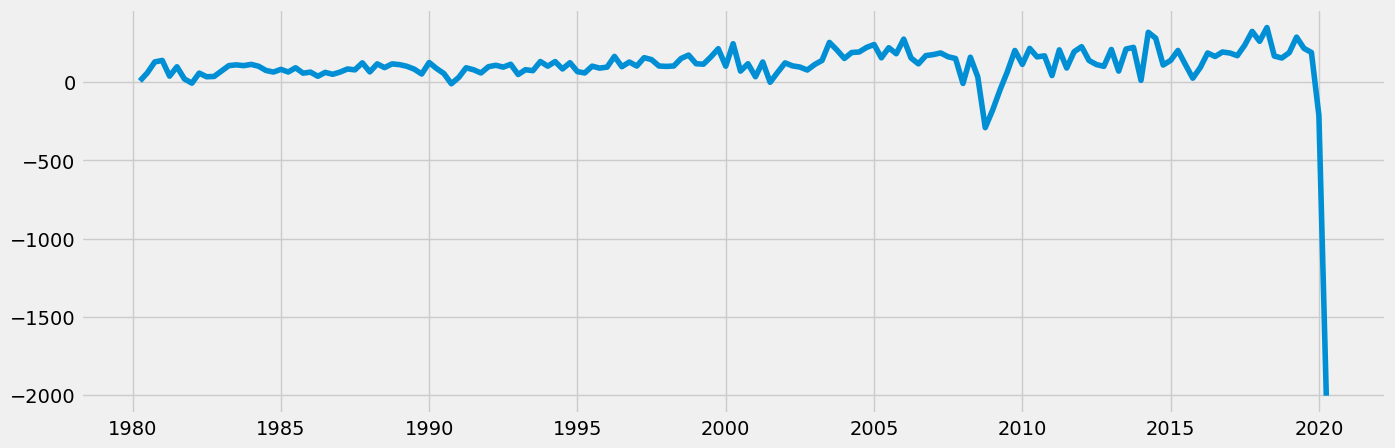

In [28]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [29]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -2.655365
p-value                          0.082086
Number of Lags Used              9.000000
Number of Observations Used    151.000000
Critical Value (1%)             -3.474416
Critical Value (5%)             -2.880878
Critical Value (10%)            -2.577081
dtype: float64


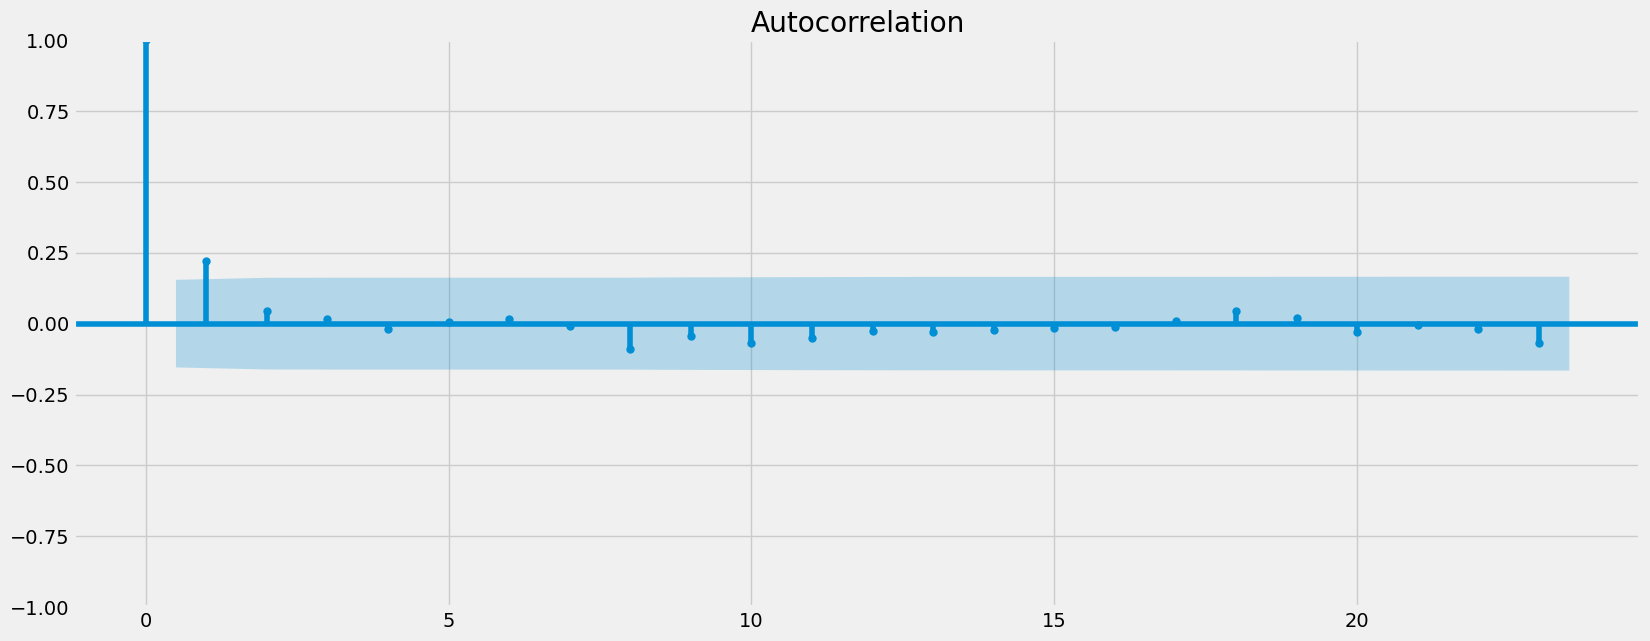

In [30]:
plot_acf(data_diff)
plt.show()